In [2]:
import sys

In [3]:
# https://github.com/jed-frey/build_opencv
sys.path.append("/opt/opencv4/lib/python3.8/site-packages")

In [4]:
import cv2
from PIL import Image

In [5]:
class ImageCV(cv2.VideoCapture):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        
    @property
    def frame(self):
        ret, frame = self.read()
        if ret:
            return frame
        else:
            raise Exception("Reading Failed")
        
    def pil_img(self):
        img = cv2.cvtColor(self.frame, cv2.COLOR_BGR2RGB)
        return Image.fromarray(img)
    
    def __enter__(self):
        return self
        
    def __exit__(self,type, value, traceback):
        if self.isOpened():
            self.release()
            

In [ ]:
from IPython.display import display

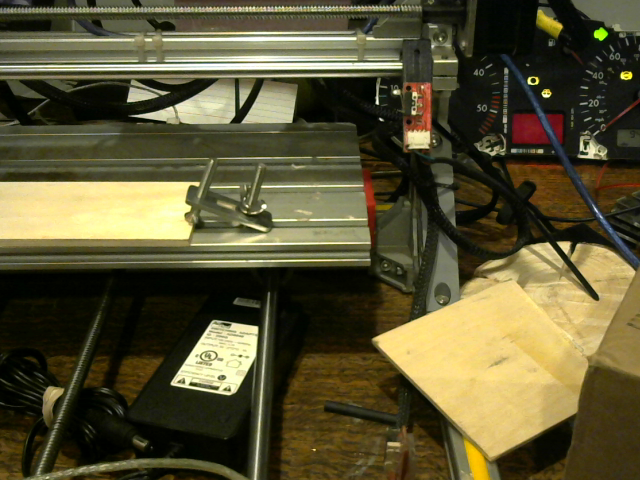

In [10]:
with ImageCV(0) as cap:
    img = cap.pil_img()
    display(img)

In [ ]:
im_pil

In [14]:
from IPython.core.magic import (register_line_magic, register_cell_magic,
                                register_line_cell_magic)

@register_line_magic
def cv_magic(*args, **kwargs):
    
    for idx, arg in enumerate(args):
        print(f"{idx}: {arg}")
    for key, value in kwargs.items():
        print(f"{key}: {value}")

In [15]:
%cv_magic

0: 


In [16]:
%cv_magic foo

0: foo


In [17]:
%cv_magic 2 4 5 6

0: 2 4 5 6


In [20]:
from IPython.core.magic import (register_line_magic, register_cell_magic,
                                register_line_cell_magic)

@register_line_magic
def cv_magic(*args, **kwargs):
    webcams = [int(arg) for arg in args[0].split(" ")]
    print(webcams)

In [21]:
%cv_magic 2 4 5 6

[2, 4, 5, 6]


In [22]:
from IPython.core.magic import (register_line_magic, register_cell_magic,
                                register_line_cell_magic)

@register_line_magic
def cv_magic(*args, **kwargs):
    webcams = [int(arg) for arg in args[0].split(" ")]
    for webcam in webcams:
        with ImageCV(webcam) as cap:
            img = cap.pil_img()
            display(img)

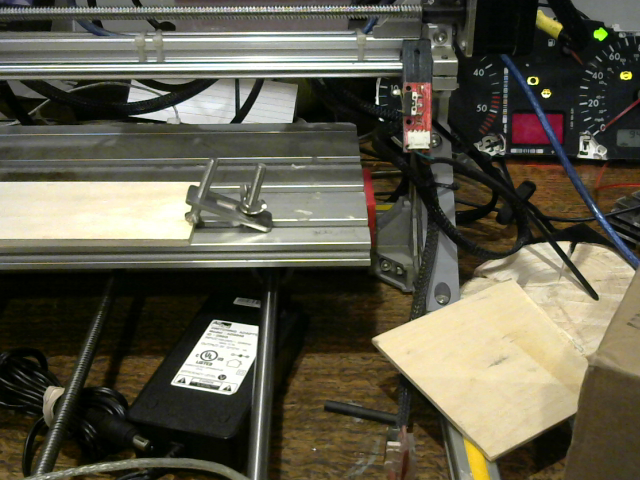

In [23]:
%cv_magic 0

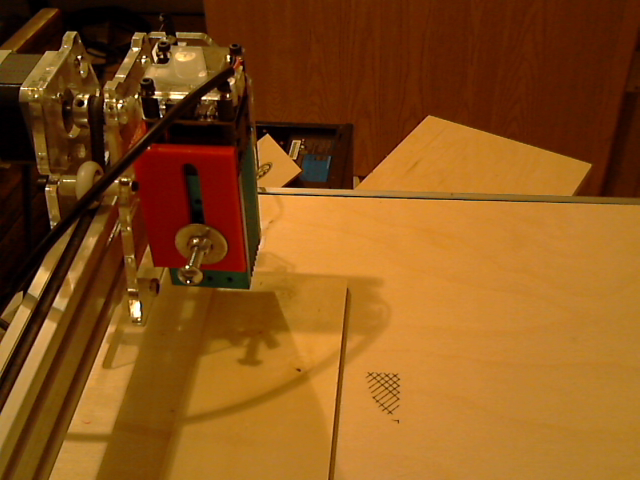

In [25]:
%cv_magic 2